In [1]:
library(Seurat)
library(monocle)
library(dplyr)
library(RColorBrewer)
library(harmony)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    %||%, intersect, t




Error in .make_numeric_version(x, strict, .standard_regexps()$valid_numeric_version) : 
  invalid non-character version specification 'x' (type: double)



Attaching package: ‘Seurat’


The following object is masked from ‘package:base’:

    %||%


Loading required package: Matrix

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'cit

In [3]:
# load in raw data and Meta data from aligned data
Young.data <- read.csv("YAP5SA_DropSeq.raw.data.csv", sep=",")
Youngmeta.data <- read.csv("YAP5SA_DropSeq.meta.data.csv", sep=",")

In [4]:
# Create Seurat object, only keeping cells that more than 10 reads and 500 genes
Young <- CreateSeuratObject(Young.data, meta.data = Youngmeta.data, min.cells = 10, min.features = 500)

Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”


In [5]:
# Remove cells that contain more than 10000 RNA count and 
# that have more that 20 percent of reads that are mitochondrial
Young <- subset(Young, subset = nCount_RNA  <10000 & percent.mito < .2)

In [6]:
# Normalizing, Finding Variable Features, Scaling Data and Find PCA of seurat Object
Young <- Young %>% 
  Seurat::NormalizeData(verbose = FALSE) %>%
  FindVariableFeatures(selection.method = "vst", nfeatures = 15000) %>% 
  ScaleData(verbose = FALSE) %>% 
  RunPCA(pc.genes = Young@var.genes, npcs = 20, verbose = FALSE)

Finding variable features for layer counts



Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony converged after 6 iterations



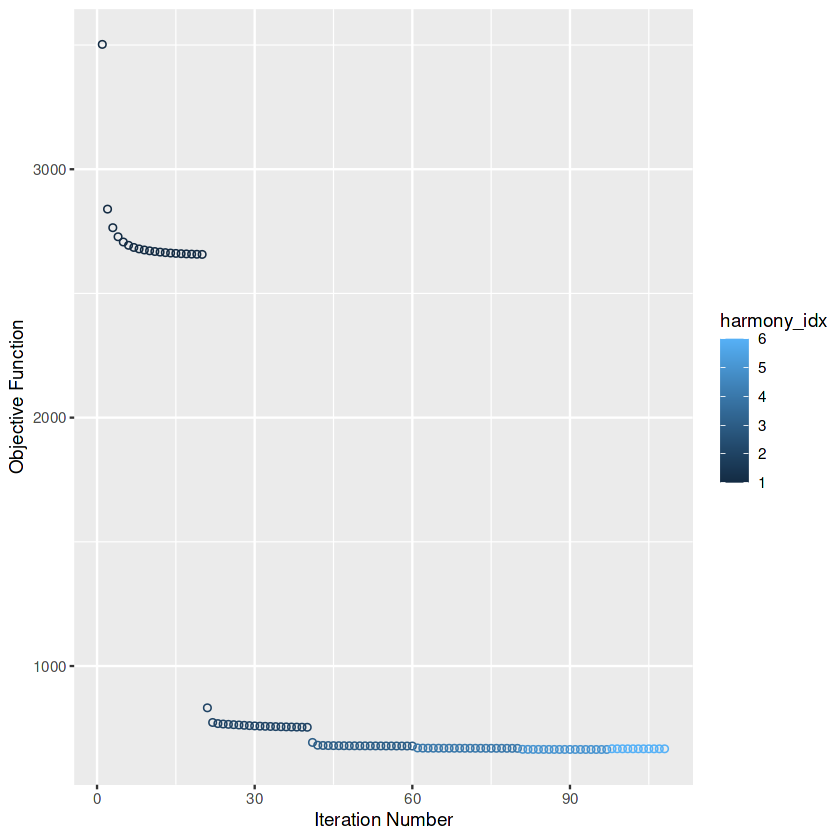

In [7]:
# Generating Harmony PCA from PCA subsequent PCA generated from normalized data
Young <- Young %>% 
  RunHarmony("orig.ident", plot_convergence = TRUE)

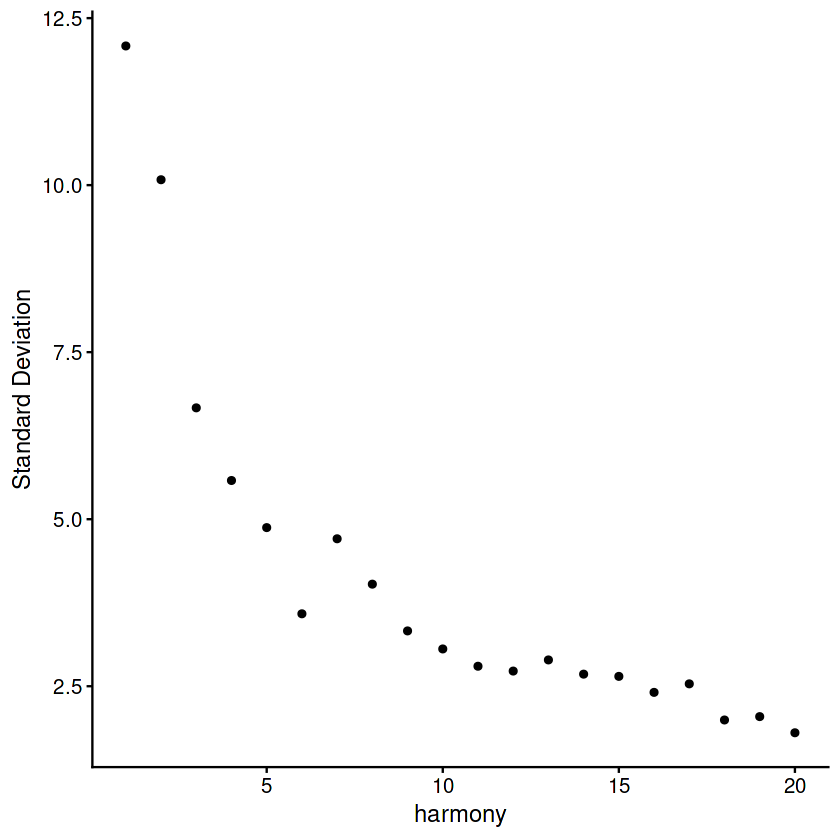

In [10]:
#Elbowplot to visualize optimal harmony components to utilize for UMAP
ElbowPlot(Young, reduction = "harmony")

In [11]:
# Dimensionally reduce harmony PCA (UMAP), 
# Construct KNN using harmony PCA
# Find Clusters at low granular level
Young <- Young %>% 
  RunUMAP(reduction = "harmony", dims = 1:20, min_dist=.001) %>% 
  FindNeighbors(reduction = "harmony", dims = 1:20) %>% 
  FindClusters(resolution = 0.1) %>% 
  identity()

Warning message:
“The following arguments are not used: min_dist”
Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:02:14 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:02:14 Read 19447 rows and found 20 numeric columns

12:02:14 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:02:14 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 19447
Number of edges: 679860

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9719
Number of communities: 6
Elapsed time: 5 seconds


In [2]:
load("AnalysisHarmony")

In [4]:
Young <- UpdateSeuratObject(Young)

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc ‘pca’

Updating matrix keys for DimReduc ‘harmony’

Updating matrix keys for DimReduc ‘umap’

Warning message:
“Assay RNA changing from Assay to Assay”
Warning message:
“Assay SCT changing from Assay to Assay”
Warning message:
“Graph RNA_nn changing from Graph to Graph”
Warning message:
“Graph RNA_snn changing from Graph to Graph”
Warning message:
“DimReduc pca changing from DimReduc to DimReduc”
Warning message:
“DimReduc harmony changing from DimReduc to DimReduc”
Warning message:
“DimReduc umap changing from DimReduc to DimReduc”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in SCT

Updating slots in RNA_nn

Setting default assay of RNA_nn to RNA

Updating slots in RNA_snn

Setting default assay of RNA_snn to RNA

Updating slots in pca

Updating slots in harmony

Upd

In [ ]:
Idents(Young) <- Young$

png 
  2

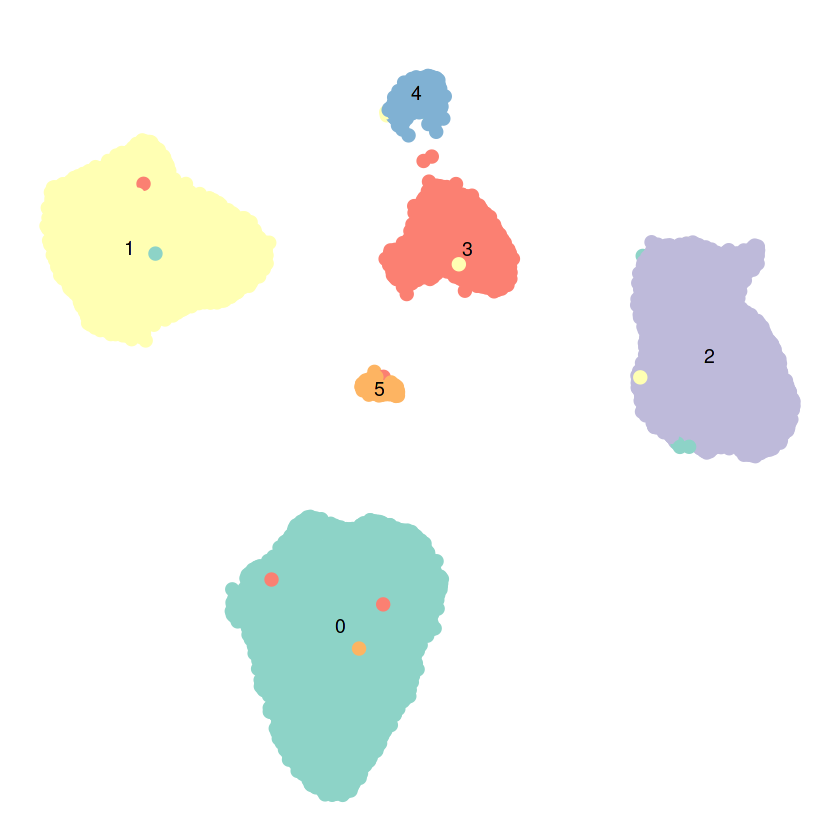

In [5]:
DimPlot(Young, cols = brewer.pal(11,"Set3"), label=T, pt.size = 3) + 
theme_void() + 
theme(legend.position = "none") +
ggtitle("")
pdf("Young_UMAP.pdf", width=10, height=10, useDingbats = FALSE)
DimPlot(Young,cols = brewer.pal(7,"Set3"), label=T) + 
theme_void() + 
theme(legend.position = "none") +
ggtitle("")
dev.off()

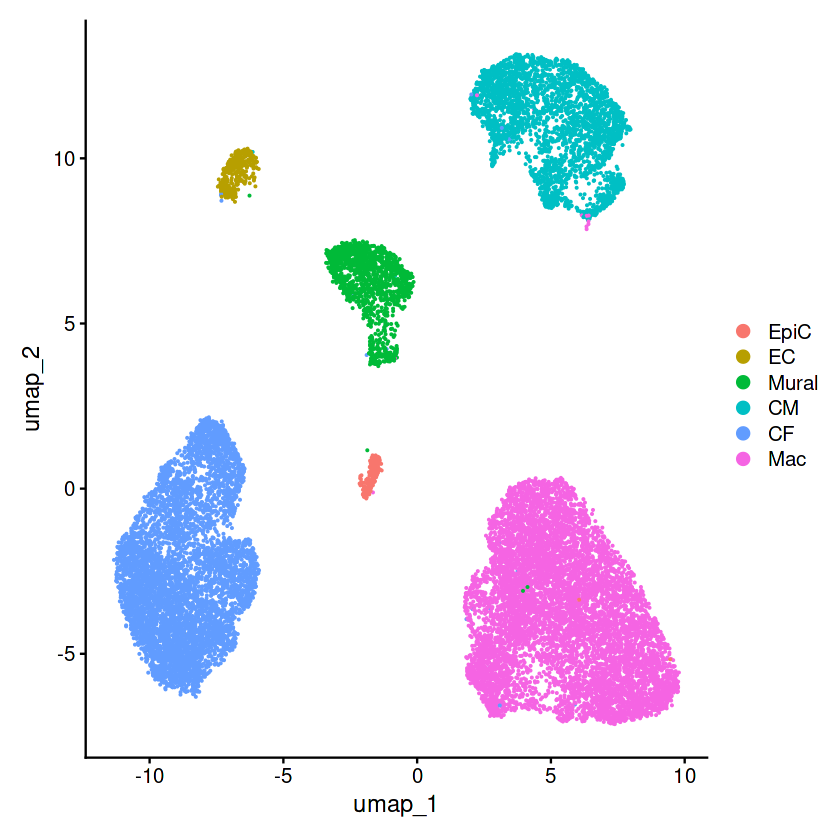

In [22]:
DimPlot(Young, reduction = "umap")

In [14]:
#Find CellType Markers that are expressed in at least 50% of the cluster and a Log2FC of .5 or greater
Young_Markers <- FindAllMarkers(Young, only.pos=TRUE, min.pct=0.50, logfc.threshold=0.50)
Young_Markers <- subset(Young_Markers, subset=p_val_adj<0.05)
YoungTop5Markers <- Young_Markers %>% group_by(cluster) %>% top_n(n=5, wt=avg_log2FC)
YoungTop5MarkersUnique <- unique(YoungTop5Markers$gene)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5



Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


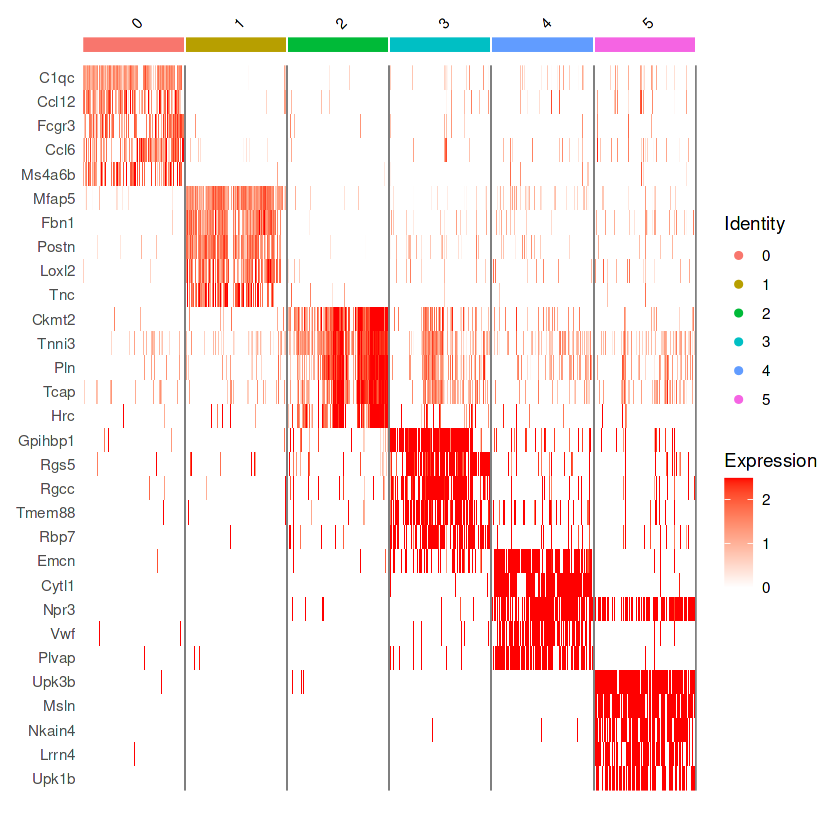

In [15]:
#Heatmap of top5 differentially expressed markers for each Cell type isolated
DoHeatmap(subset(Young, downsample = 100), features = YoungTop5MarkersUnique,  size = 3) + 
scale_fill_gradient2(low="white",mid="white",high="red")


In [6]:
# Label Cell Clusters for appropriate Cell Type based on differentially expressed markers
Idents(Young) <- Young$`RNA_snn_res.0.1`
Young <- RenameIdents(Young, "0"="Mac")
Young <- RenameIdents(Young, "1"="CF")
Young <- RenameIdents(Young, "2"="CM")
Young <- RenameIdents(Young, "3"="Mural")
Young <- RenameIdents(Young, "4"="EC")
Young <- RenameIdents(Young, "5"='EpiC')
Young$CellType <- Idents(Young)

png 
  2

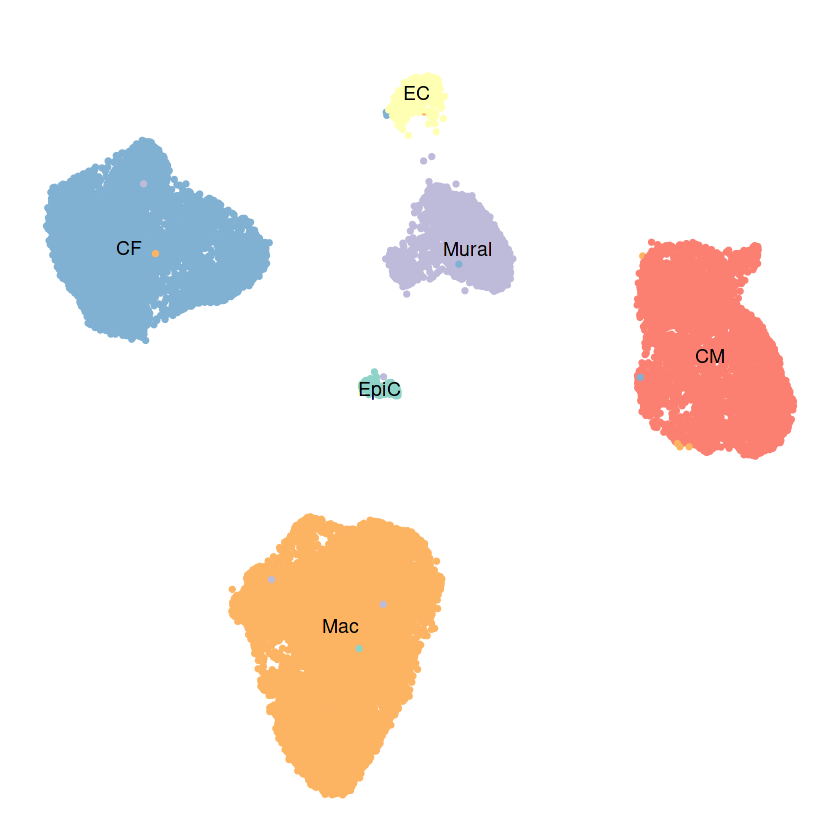

In [8]:
DimPlot(Young, cols = brewer.pal(11,"Set3"), label=T, pt.size = 1) + 
theme_void() + 
theme(legend.position = "none") +
ggtitle("")
pdf("Young_UMAP.pdf", width=10, height=10, useDingbats = FALSE)
DimPlot(Young,cols = brewer.pal(7,"Set3"), label=T) + 
theme_void() + 
theme(legend.position = "none") +
ggtitle("")
dev.off()

In [10]:
library(dplyr)
#After Cluster labeling
#Find CellType Markers that are expressed in at least 50% of the cluster and a Log2FC of .5 or greater
Young_Markers <- FindAllMarkers(Young, only.pos=TRUE, min.pct=0.50, logfc.threshold=0.50)
Young_Markers <- subset(Young_Markers, subset=p_val_adj <.05)
YoungTop5Markers <- Young_Markers %>% group_by(cluster) %>% top_n(n=5, wt=avg_log2FC)
YoungTop5MarkersUnique <- unique(YoungTop5Markers$gene)
write.table(Young_Markers, "Young_Markers.txt", sep="\t")

Calculating cluster EpiC

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Calculating cluster EC

Calculating cluster Mural

Calculating cluster CM

Calculating cluster CF

Calculating cluster Mac



Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


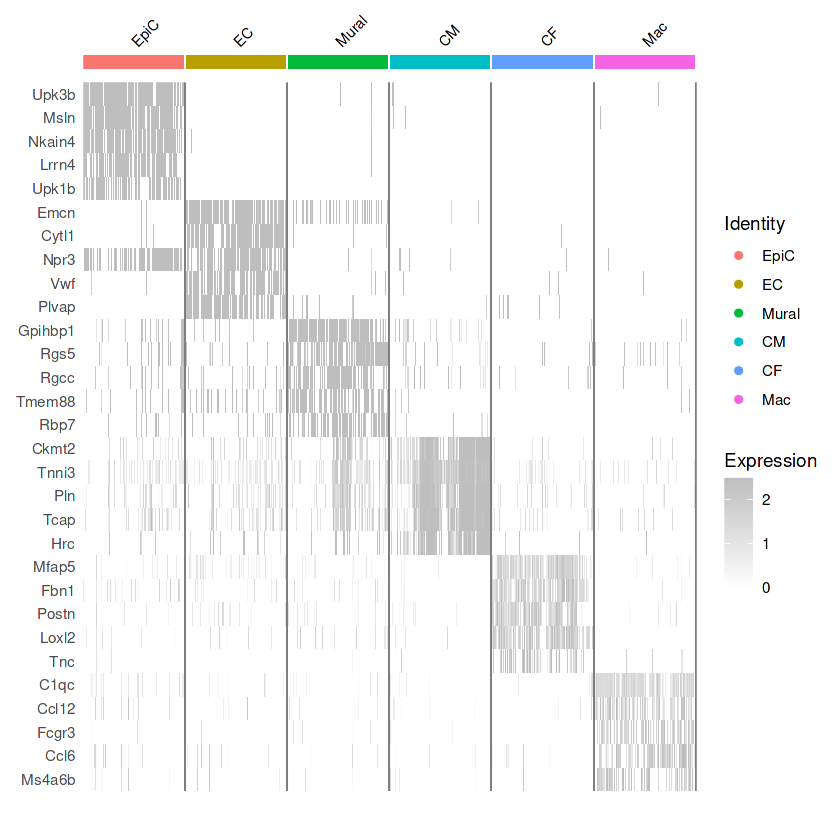

In [19]:
#After Cluster Labeling
#Heatmap of top5 differentially expressed markers for each Cell type isolated
DoHeatmap(subset(Young, downsample = 100), features = YoungTop5MarkersUnique,  size = 3) + 
scale_fill_gradient2(low="white",mid="white",high="grey")


In [11]:
pdf("Young_Marker_heatmap.pdf", width=5, height=5)
DoHeatmap(subset(Young, downsample = 100), 
          group.colors = brewer.pal(11,"Set3"),
          features = YoungTop5MarkersUnique,  
          size = 3) + 
scale_fill_gradient2(low="white",mid="white",high="grey")
dev.off()

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


png 
  2

png 
  2

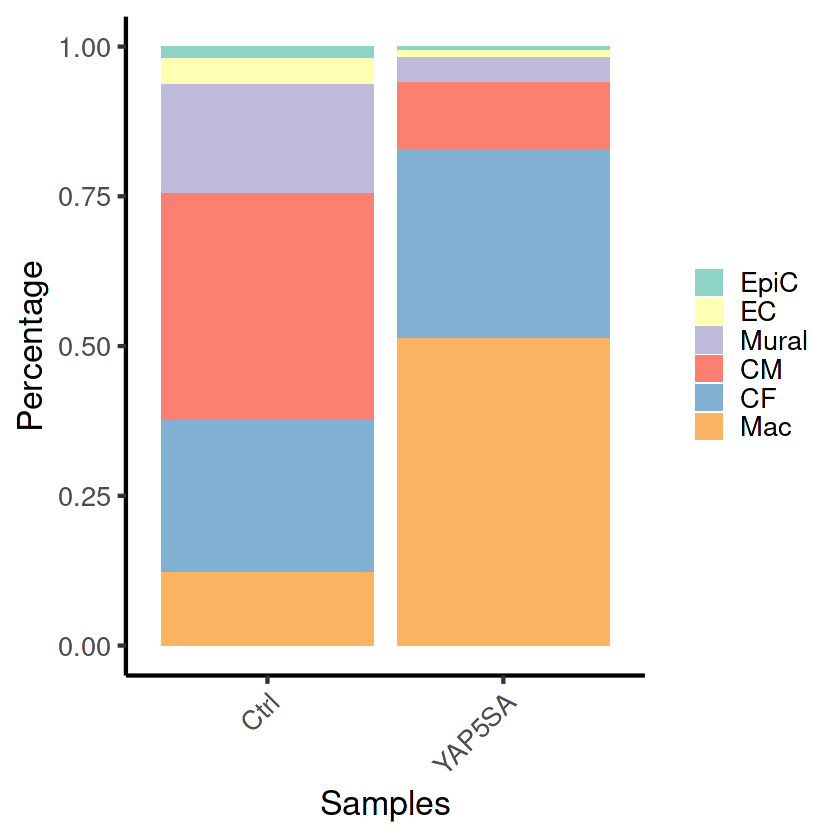

In [12]:
Counttable <- data.frame(table(Young$CellType, Young$Experiment))
ggplot(Counttable, aes(fill=Var1, y=Freq, x=Var2)) + 
    scale_fill_brewer(palette="Set3") + 
    geom_bar(position="fill", stat="identity") +
    theme_classic(base_size = 20) +
    xlab("Samples") + 
    ylab("Percentage") +   
    theme(legend.title=element_blank()) +
    RotatedAxis()
pdf("Young_Composition_Experiment.pdf", width=5, height=5)
ggplot(Counttable, aes(fill=Var1, y=Freq, x=Var2)) + 
    scale_fill_brewer(palette="Set3") + 
    geom_bar(position="fill", stat="identity") +
    theme_classic(base_size = 20) +
    xlab("Samples") + 
    ylab("Percentage") +   
    theme(legend.title=element_blank()) +
    RotatedAxis()
dev.off()

png 
  2

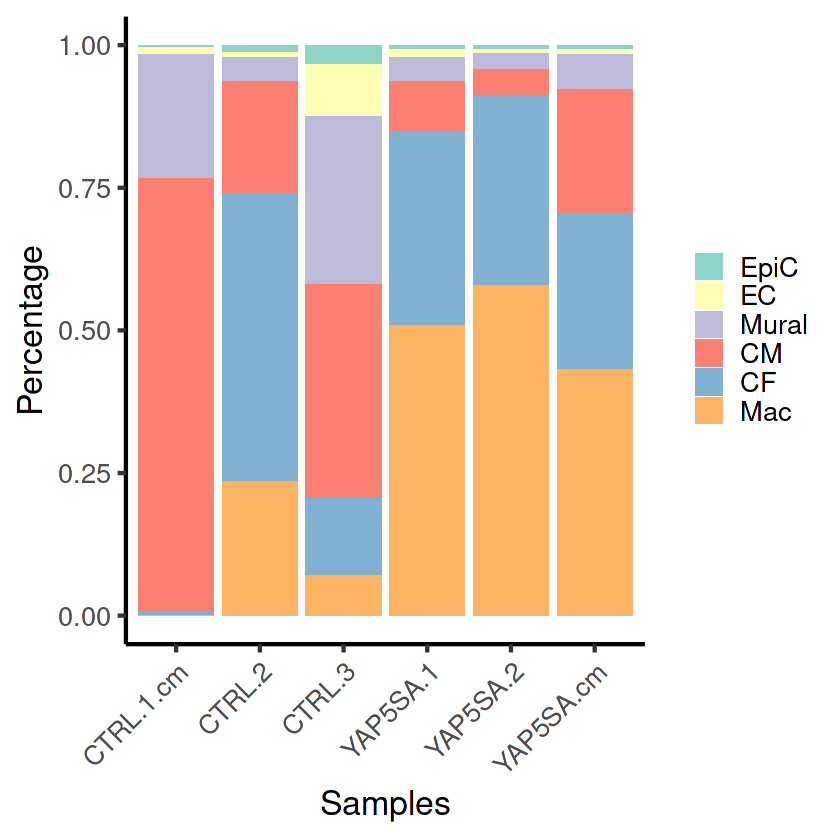

In [34]:
Counttable <- data.frame(table(Young$CellType, Young$orig.ident))
ggplot(Counttable, aes(fill=Var1, y=Freq, x=Var2)) + 
    scale_fill_brewer(palette="Set3") + 
    geom_bar(position="fill", stat="identity") +
    theme_classic(base_size = 20) +
    xlab("Samples") + 
    ylab("Percentage") +   
    theme(legend.title=element_blank()) +
    RotatedAxis()
write.csv(Counttable, "Young_Composition_table.csv")
pdf("Young_Composition.pdf", width=5, height=5)
ggplot(Counttable, aes(fill=Var1, y=Freq, x=Var2)) + 
    scale_fill_brewer(palette="Set3") + 
    geom_bar(position="fill", stat="identity") +
    theme_classic(base_size = 20) +
    xlab("Samples") + 
    ylab("Percentage") +   
    theme(legend.title=element_blank()) +
    RotatedAxis()
dev.off()

In [24]:
#Subset Cardiomyocytes from "Young" object for Cell State Analysis
CMHarmony <- subset(Young, idents="CM")

In [25]:
# Normalizing, Finding Variable Features, Scaling Data and Find PCA of Cardiomyocytes
CMHarmony <- CMHarmony %>% 
  FindVariableFeatures(selection.method = "vst", nfeatures = 15000) %>% 
  ScaleData(verbose = FALSE) %>% 
  RunPCA(pc.genes = Young@var.genes, npcs = 20, verbose = FALSE)


Finding variable features for layer counts

Warning message:
“Different features in new layer data than already exists for scale.data”


Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10



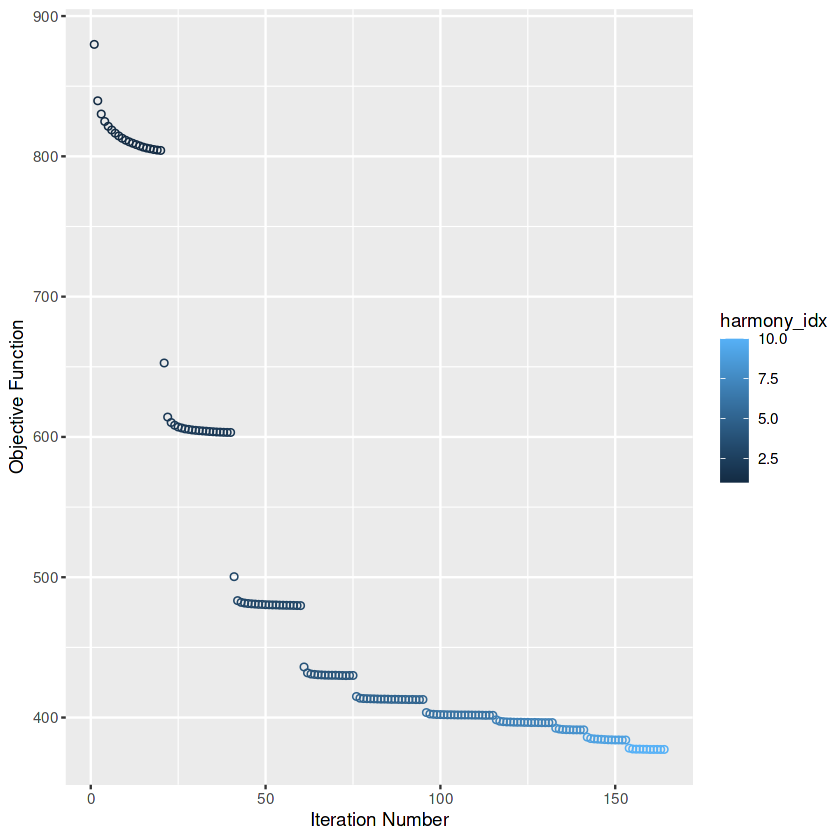

In [26]:
# Generating Harmony PCA from PCA subsequent PCA generated from normalized data
CMHarmony <- CMHarmony %>% 
  RunHarmony("orig.ident", plot_convergence = TRUE)

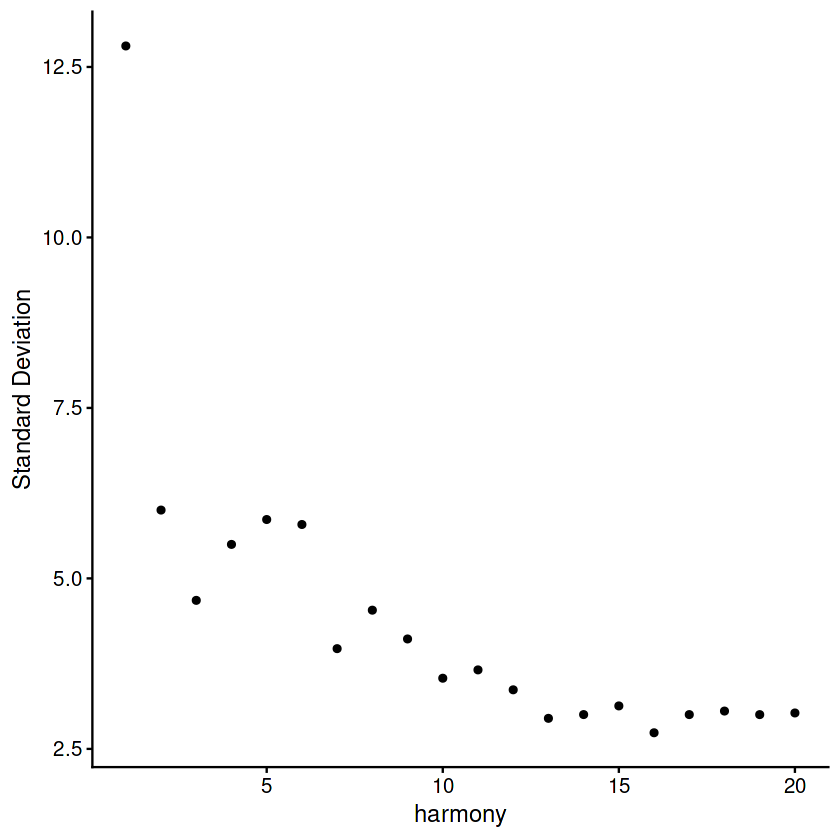

In [27]:
#Elbowplot to visualize optimal harmony components to utilize for UMAP
ElbowPlot(CMHarmony, reduction = "harmony")

In [38]:
# Dimensionally reduce harmony PCA (UMAP), 
# Construct KNN using harmony PCA
# Find Clusters at low granular level
CMHarmony <- CMHarmony %>% 
  RunUMAP(reduction = "harmony", dims = 1:10) %>% 
  FindNeighbors(reduction = "harmony", dims = 1:10) %>% 
  FindClusters(resolution = 0.2) %>% 
  identity()

13:03:26 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

13:03:26 Read 3040 rows and found 10 numeric columns

13:03:26 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

13:03:26 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:03:27 Writing NN index file to temp file /tmp/RtmpmQo5Rl/file37c06e9b11de

13:03:27 Searching Annoy index using 1 thread, search_k = 3000

13:03:29 Annoy recall = 100%

13:03:30 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:03:30 Initializing from normalized Laplacian + n

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3040
Number of edges: 100008

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9299
Number of communities: 9
Elapsed time: 0 seconds


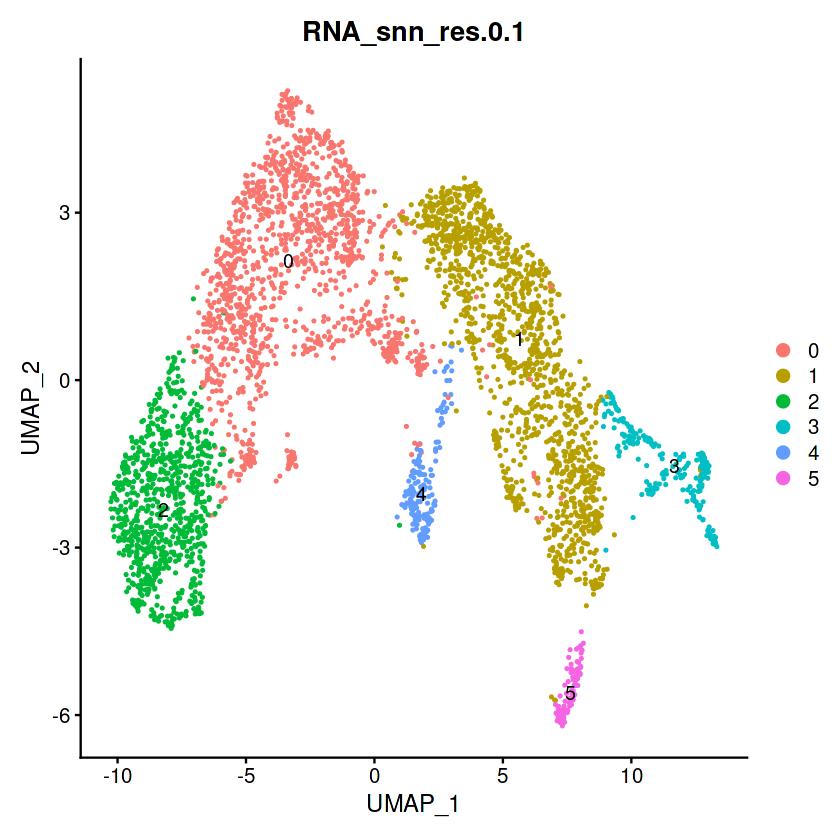

In [59]:
#Dimplot of Cardimyocytes cell states at low resolution
DimPlot(CMHarmony, group.by="RNA_snn_res.0.1", label=T)

In [62]:
#Find Cardiomyocyte cell state Markers that are expressed 
#in at least 50% of the cluster and a Log2FC of .5 or greater
library(dplyr)
Idents(CMHarmony) <- CMHarmony$`RNA_snn_res.0.1`
CMHarmony_Markers <- FindAllMarkers(CMHarmony, only.pos=TRUE, min.pct=0.25, logfc.threshold=0.25)
CMHarmony_Markers <- subset(CMHarmony_Markers, subset=p_val_adj <.05)
CMHarmony_Markers <- CMHarmony_Markers[!grepl("mt-", CMHarmony_Markers$gene),]
CMHarmony_Markers <- CMHarmony_Markers[!grepl("-", CMHarmony_Markers$gene),]
CMHarmony_Markers <- CMHarmony_Markers[!grepl("Gm", CMHarmony_Markers$gene),]
CMHarmonyTop5Markers <- CMHarmony_Markers %>% group_by(cluster) %>% top_n(n=5, wt=avg_log2FC)
CMHarmonyTop5MarkersUnique <- unique(CMHarmonyTop5Markers$gene)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5



Warning message in DoHeatmap(subset(CMHarmony, downsample = 100), features = CMHarmonyTop5MarkersUnique, :
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: Arhgap11a, Adhfe1, C130080G10Rik, Ttll1”
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


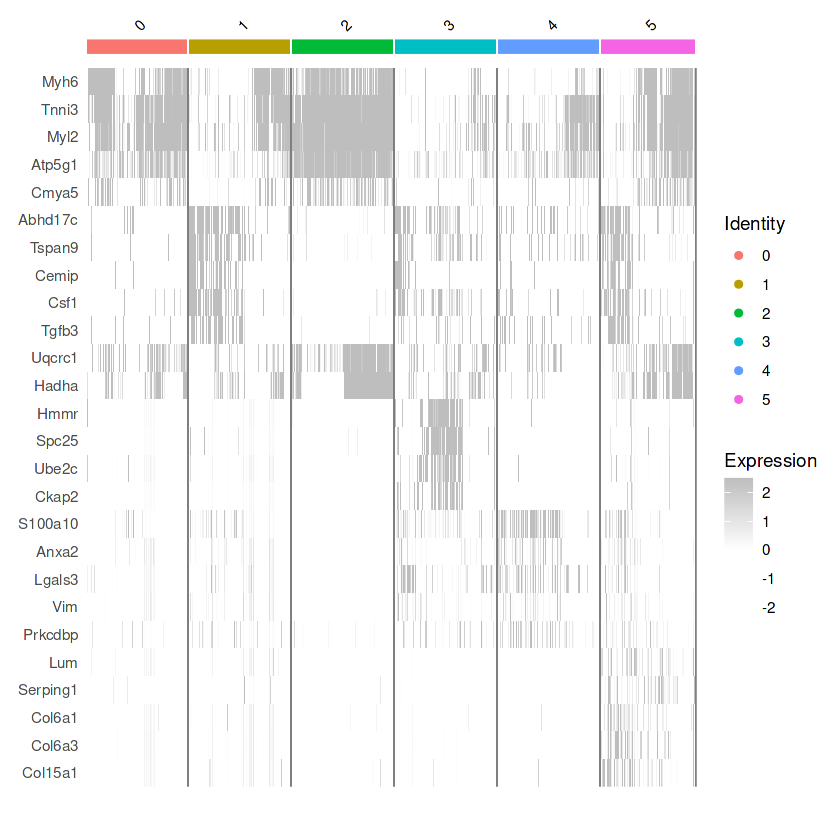

In [63]:
#Heatmap of top5 differentially expressed markers for each CM Cell state isolated
DoHeatmap(subset(CMHarmony, downsample = 100), features = CMHarmonyTop5MarkersUnique,  size = 3) + 
scale_fill_gradient2(low="white",mid="white",high="grey")

In [67]:
#Labeling of CM Cell states 
Idents(CMHarmony) <- CMHarmony$`RNA_snn_res.0.1`
CMHarmony <- RenameIdents(CMHarmony, "2"="CM A")
CMHarmony <- RenameIdents(CMHarmony, "0"="CM A")
CMHarmony <- RenameIdents(CMHarmony, "1"="CM B")
CMHarmony <- RenameIdents(CMHarmony, "4"="CM C")
CMHarmony <- RenameIdents(CMHarmony, "5"="CM D")
CMHarmony <- RenameIdents(CMHarmony, "3"="CM G2M")
CMHarmony$Idents <- Idents(CMHarmony)
CMHarmony$Idents <- factor(CMHarmony$Idents, levels=c("CM A","CM B","CM C","CM D","CM G2M"))

In [52]:
load("AnalysisHarmony")

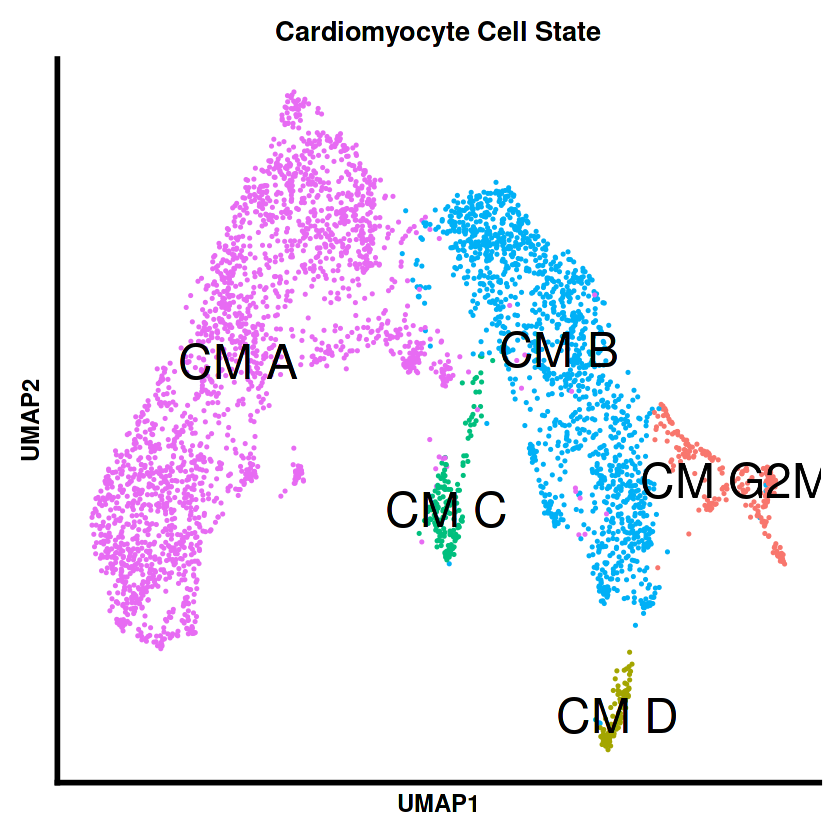

In [68]:
DimPlot(CMHarmony, label=T,label.size = 10) +
theme(plot.title = element_text(hjust = 0.5,face = "bold")) +
theme(legend.position = "none") +
ggtitle("Cardiomyocyte Cell State") +
theme(
  axis.text.x = element_blank(),
  axis.text.y = element_blank(),
axis.title.x = element_text(face="bold"),
axis.title.y = element_text(face="bold"),
  axis.ticks = element_blank(),
  axis.line.y = element_line(size = 1.2),
  axis.line.x = element_line(size = 1.2)) +
xlab("UMAP1") +
ylab("UMAP2")

In [70]:
library(dplyr)
Idents(CMHarmony) <- CMHarmony$Idents
CMHarmony_Markers <- FindAllMarkers(CMHarmony, only.pos=TRUE, min.pct=0.25, logfc.threshold=0.25)
CMHarmony_Markers <- subset(CMHarmony_Markers, subset=p_val_adj <.05)
CMHarmony_Markers <- CMHarmony_Markers[!grepl("mt-", CMHarmony_Markers$gene),]
CMHarmony_Markers <- CMHarmony_Markers[!grepl("-", CMHarmony_Markers$gene),]
CMHarmony_Markers <- CMHarmony_Markers[!grepl("Gm", CMHarmony_Markers$gene),]
CMHarmonyTop5Markers <- CMHarmony_Markers %>% group_by(cluster) %>% top_n(n=5, wt=avg_log2FC)
CMHarmonyTop5MarkersUnique <- unique(CMHarmonyTop5Markers$gene)

Calculating cluster CM A

Calculating cluster CM B

Calculating cluster CM C

Calculating cluster CM D

Calculating cluster CM G2M



Warning message in DoHeatmap(subset(Young, downsample = 100), features = CMHarmonyTop5MarkersUnique, :
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: Arhgap11a, Ift81, Car14, Yipf7, Ttll1”
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


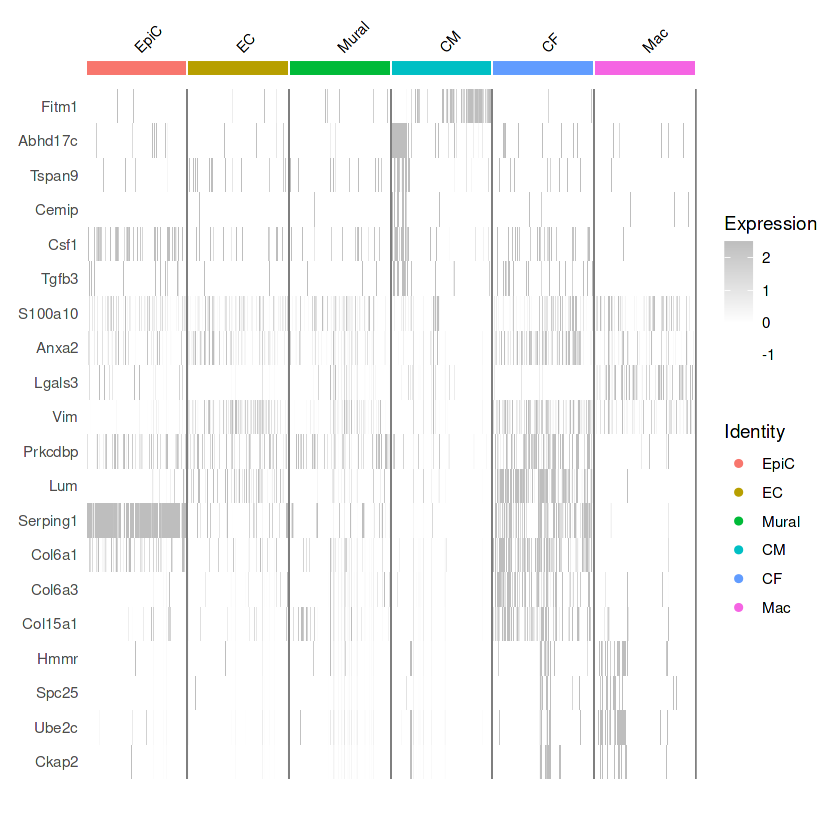

In [75]:
Idents(Young) <- Young$CellType
DoHeatmap(subset(Young, downsample = 100), features = CMHarmonyTop5MarkersUnique,  size = 3) + 
scale_fill_gradient2(low="white",mid="white",high="grey")

png 
  2

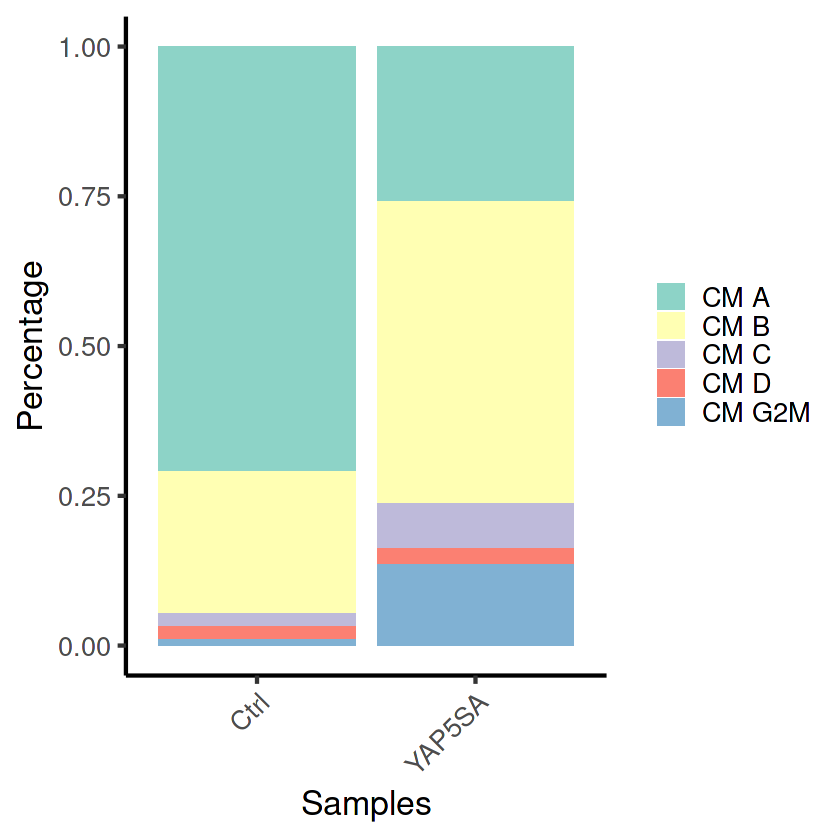

In [13]:
Counttable <- data.frame(table(CMHarmony$Idents, CMHarmony$Experiment))
ggplot(Counttable, aes(fill=Var1, y=Freq, x=Var2)) + 
    scale_fill_brewer(palette="Set3") + 
    geom_bar(position="fill", stat="identity") +
    theme_classic(base_size = 20) +
    xlab("Samples") + 
    ylab("Percentage") +   
    theme(legend.title=element_blank()) +
    RotatedAxis()
pdf("CMHarmony_Composition_Experiment.pdf", width=6, height=6)
ggplot(Counttable, aes(fill=Var1, y=Freq, x=Var2)) + 
    scale_fill_brewer(palette="Set3") + 
    geom_bar(position="fill", stat="identity") +
    theme_classic(base_size = 20) +
    xlab("Samples") + 
    ylab("Percentage") +   
    theme(legend.title=element_blank()) +
    RotatedAxis()
dev.off()

png 
  2

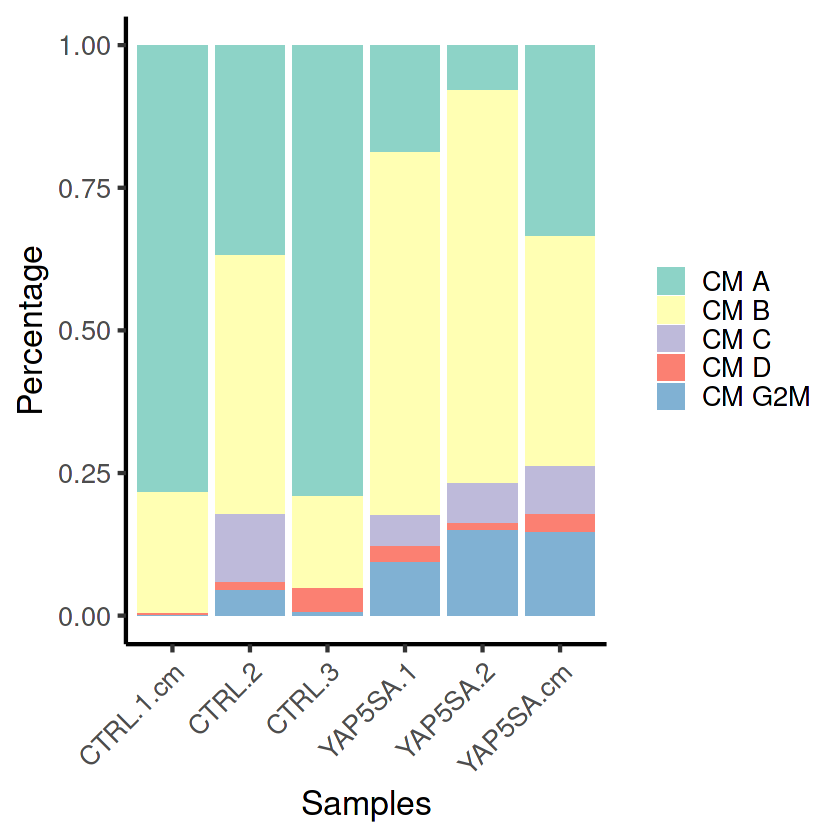

In [65]:
Counttable <- data.frame(table(CMHarmony$Idents, CMHarmony$orig.ident))
ggplot(Counttable, aes(fill=Var1, y=Freq, x=Var2)) + 
    scale_fill_brewer(palette="Set3") + 
    geom_bar(position="fill", stat="identity") +
    theme_classic(base_size = 20) +
    xlab("Samples") + 
    ylab("Percentage") +   
    theme(legend.title=element_blank()) +
    RotatedAxis()
write.csv(Counttable, "CMHarmony_Composition2_table.csv")
pdf("CMHarmony_Composition.pdf", width=6, height=6)
ggplot(Counttable, aes(fill=Var1, y=Freq, x=Var2)) + 
    scale_fill_brewer(palette="Set3") + 
    geom_bar(position="fill", stat="identity") +
    theme_classic(base_size = 20) +
    xlab("Samples") + 
    ylab("Percentage") +   
    theme(legend.title=element_blank()) +
    RotatedAxis()
dev.off()

In [66]:
CounttableWithPercent <- read.csv("CMHarmony_Composition_table.csv")
CounttableWithPercent_aov <- aov(Percent ~ Experiment * Sample, data=Counttable)
Counttable_THSD <- TukeyHSD(CounttableWithPercent_aov)
write.csv(Counttable_THSD$`Sample:Var1`, "CMHarmony_THSD.csv")

png 
  2

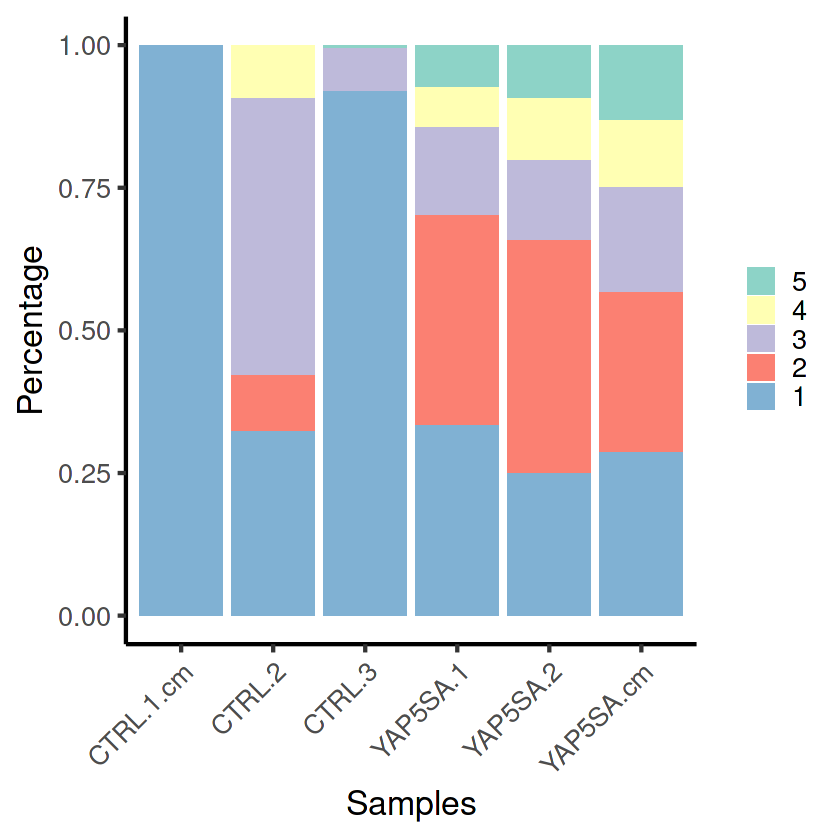

In [35]:
Counttable <- data.frame(table(CMHarmony2$Idents, CMHarmony2$orig.ident))
ggplot(Counttable, aes(fill=Var1, y=Freq, x=Var2)) + 
    scale_fill_brewer(palette="Set3") + 
    geom_bar(position="fill", stat="identity") +
    theme_classic(base_size = 20) +
    xlab("Samples") + 
    ylab("Percentage") +   
    theme(legend.title=element_blank()) +
    RotatedAxis()
write.csv(Counttable, "CMHarmony2_Composition_table.csv")
pdf("CMHarmony2_Composition.pdf", width=6, height=6)
ggplot(Counttable, aes(fill=Var1, y=Freq, x=Var2)) + 
    scale_fill_brewer(palette="Set3") + 
    geom_bar(position="fill", stat="identity") +
    theme_classic(base_size = 20) +
    xlab("Samples") + 
    ylab("Percentage") +   
    theme(legend.title=element_blank()) +
    RotatedAxis()
dev.off()

In [84]:
library(dplyr)
CMHarmony_Markers <- FindAllMarkers(CMHarmony, only.pos=TRUE, min.pct=0.25, logfc.threshold=0.5)
CMHarmony_Markers <- subset(CMHarmony_Markers, subset=p_val_adj <.05)
CMHarmonyTop5Markers <- CMHarmony_Markers %>% group_by(cluster) %>% top_n(n=5, wt=avg_log2FC)
CMHarmonyTop5MarkersUnique <- unique(CMHarmonyTop5Markers$gene)
write.table(CMHarmony_Markers, "CMHarmony_Markers.txt", sep="\t")

Calculating cluster CM A

Calculating cluster CM B

Calculating cluster CM C

Calculating cluster CM D

Calculating cluster CM G2M



Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


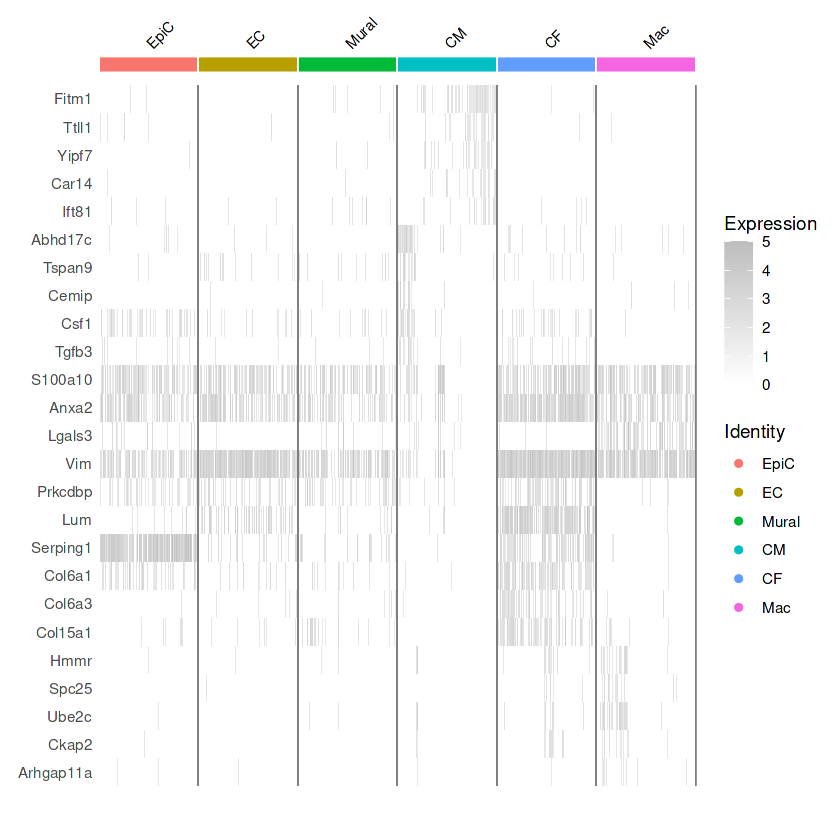

In [78]:
DoHeatmap(subset(Young, downsample = 100),slot = "data", features = CMHarmonyTop5MarkersUnique,  size = 3) + 
scale_fill_gradient2(low="white",mid="white",high="grey")

Warning message in DoHeatmap(subset(CMHarmony, downsample = 100), features = CMHarmonyTop5MarkersUnique, :
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: Arhgap11a, Ift81, Car14, Yipf7, Ttll1”
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


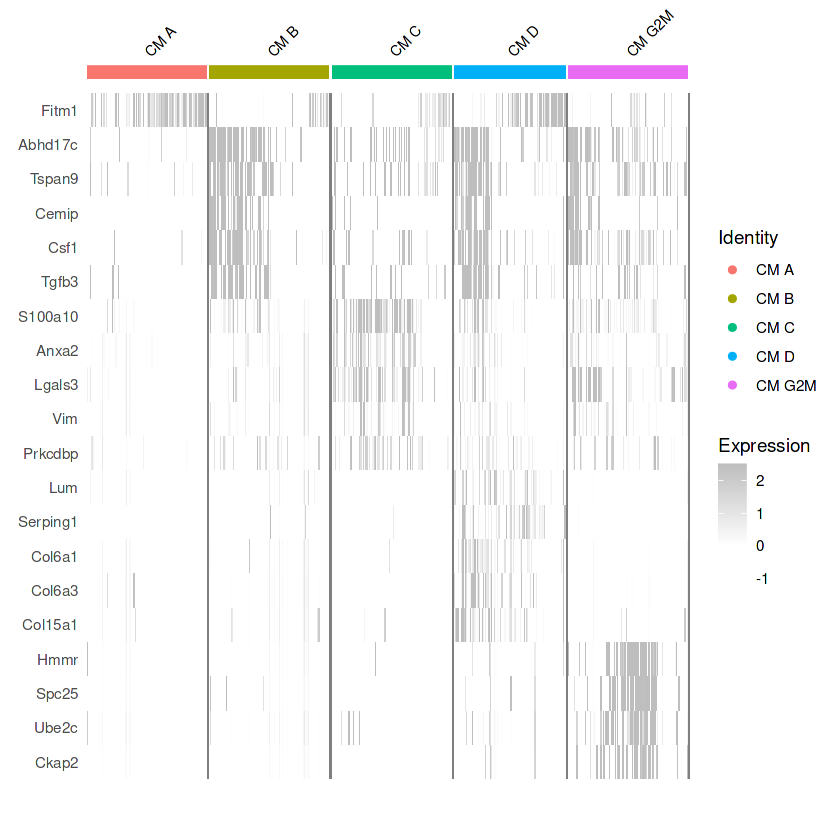

In [79]:
DoHeatmap(subset(CMHarmony, downsample = 100), features = CMHarmonyTop5MarkersUnique,  size = 3) + 
scale_fill_gradient2(low="white",mid="white",high="grey")

In [86]:
pdf("CMHarmony_Marker_heatmap.pdf", width=5, height=5)
DoHeatmap(subset(CMHarmony, downsample = 100), features = CMHarmonyTop5MarkersUnique,  size = 3) + 
scale_fill_gradient2(low="white",mid="white",high="grey")
dev.off()

Warning message in DoHeatmap(subset(CMHarmony, downsample = 100), features = CMHarmonyTop5MarkersUnique, :
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: Arhgap11a, Ift81, Car14, Yipf7, Ttll1”
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


png 
  2

In [ ]:
DefaultAssay(CMHarmony) <- "RNA"
CMHarmony2 <- subset(CMHarmony, idents=c("CM B","CM G2M"))

In [ ]:
CMHarmony2 <- CMHarmony2 %>%
  FindVariableFeatures(selection.method = "vst", nfeatures = 15000) %>% 
  ScaleData(verbose = FALSE) %>% 
  RunPCA(pc.genes = Young@var.genes, npcs = 20, verbose = FALSE)

In [ ]:
CMHarmony2 <- CMHarmony2 %>% 
  RunHarmony("orig.ident", plot_convergence = TRUE)

In [ ]:
CMHarmony2 <- CMHarmony2 %>% 
  RunUMAP(reduction = "harmony", dims = 1:10) %>% 
  FindNeighbors(reduction = "harmony", dims = 1:10) %>% 
  FindClusters(resolution = .1) %>% 
  identity()

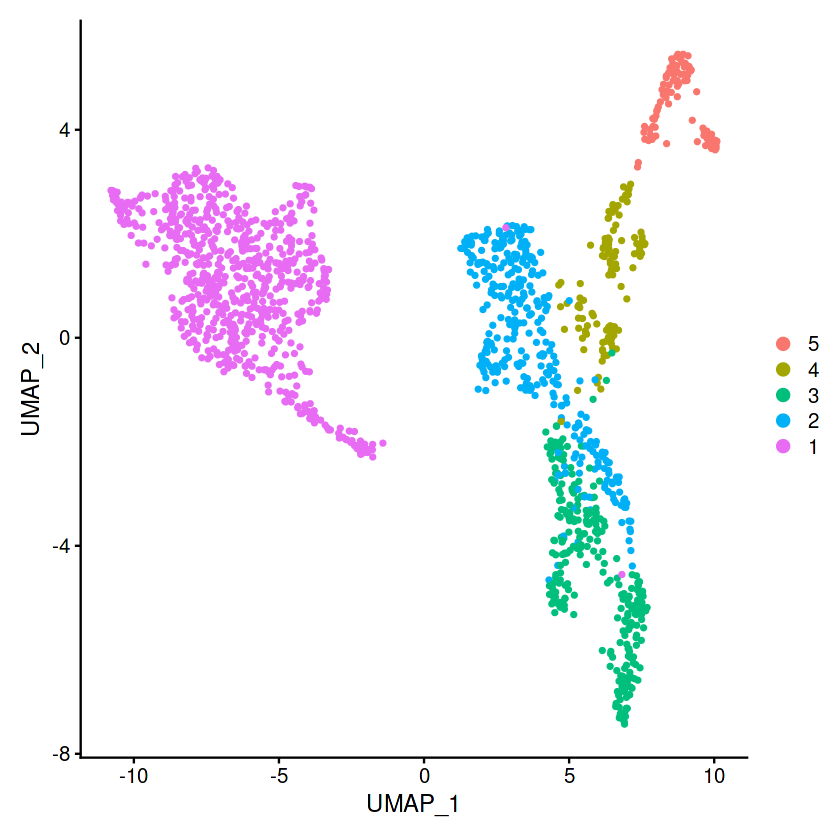

In [81]:
DimPlot(CMHarmony2)

In [84]:
CMHarmony2$Idents <- Idents(CMHarmony2)

In [85]:
CMHarmony2$Idents <- factor(CMHarmony2$Idents, level=c("1","2","3","4","5"))

In [88]:
library(dplyr)
Idents(CMHarmony2) <- CMHarmony2$Idents
CMHarmony2_Markers <- FindAllMarkers(CMHarmony2, only.pos=TRUE, min.pct=0.25, logfc.threshold=0.5)
CMHarmony2_Markers <- subset(CMHarmony2_Markers, subset=p_val_adj <.05)
CMHarmony2_Markers <- CMHarmony2_Markers[!grepl("mt-", CMHarmony2_Markers$gene),]
CMHarmony2_Markers <- CMHarmony2_Markers[!grepl("-", CMHarmony2_Markers$gene),]
CMHarmony2_Markers <- CMHarmony2_Markers[!grepl("Rik", CMHarmony2_Markers$gene),]
CMHarmony2Top5Markers <- CMHarmony2_Markers %>% group_by(cluster) %>% top_n(n=5, wt=avg_log2FC)
CMHarmony2Top5MarkersUnique <- unique(CMHarmony2Top5Markers$gene)
write.table(CMHarmony2_Markers, "CMHarmony2_Markers.txt", sep="\t")

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5



Warning message in DoHeatmap(subset(CMHarmony2, downsample = 100), features = CMHarmony2Top5MarkersUnique, :
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: Kif4, Gm11974, Gm11966, Dgat2”
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


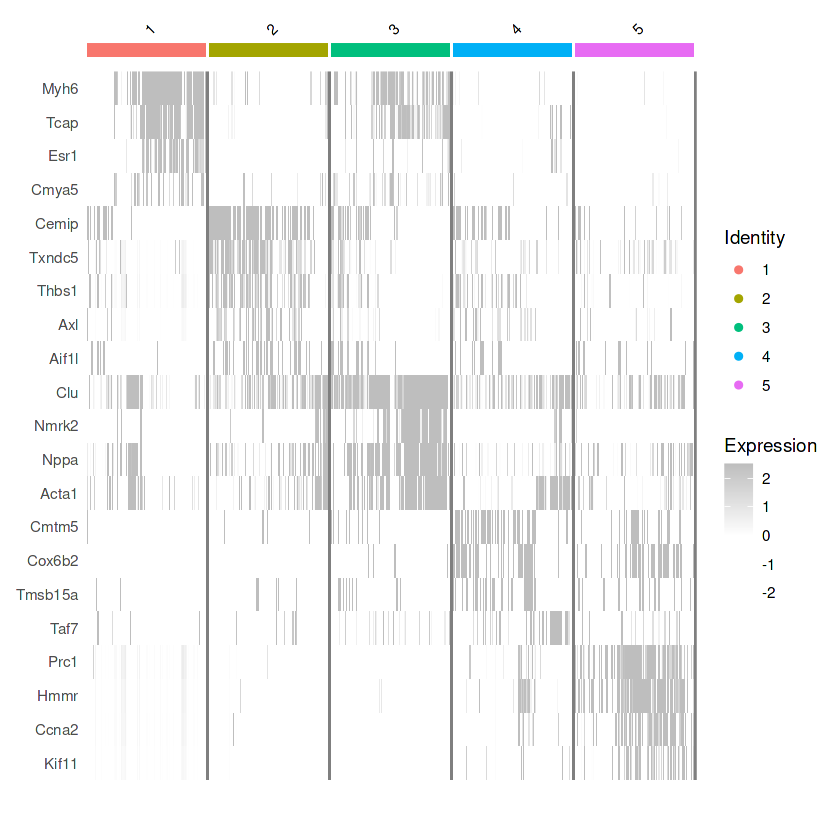

In [89]:
DoHeatmap(subset(CMHarmony2, downsample = 100), features = CMHarmony2Top5MarkersUnique,  size = 3) + 
scale_fill_gradient2(low="white",mid="white",high="grey")

In [100]:
pdf("CMHarmony2_Marker_heatmap.pdf", width=5, height=5)
DoHeatmap(subset(CMHarmony2, downsample = 100), features = CMHarmony2Top5MarkersUnique,  size = 3) + 
scale_fill_gradient2(low="white",mid="white",high="grey")
dev.off()

Warning message in DoHeatmap(subset(CMHarmony2, downsample = 100), features = CMHarmony2Top5MarkersUnique, :
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: Kif4, Gm11974, Gm11966, Dgat2”
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


png 
  2

# Round Score Analysis

In [95]:
RoundingTargets <- read.table("RoundingTargets.txt", sep="\t")

In [97]:
DefaultAssay(CMHarmony) <- "RNA"
CMHarmony <- AddModuleScore(CMHarmony, features = list(RoundingTargets$V1), name = "Rounding_Score")

DefaultAssay(CMHarmony) <- "RNA"
CMHarmony2 <- AddModuleScore(CMHarmony2, features = list(RoundingTargets$V1), name = "Rounding_Score")

Warning message:
“The following features are not present in the object: Diaph1, Retreg2, Septin1, Septin9, Tic1, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Diaph1, Retreg2, Septin1, Septin9, Tic1, not searching for symbol synonyms”


Warning message in brewer.pal(n = 11, name = "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


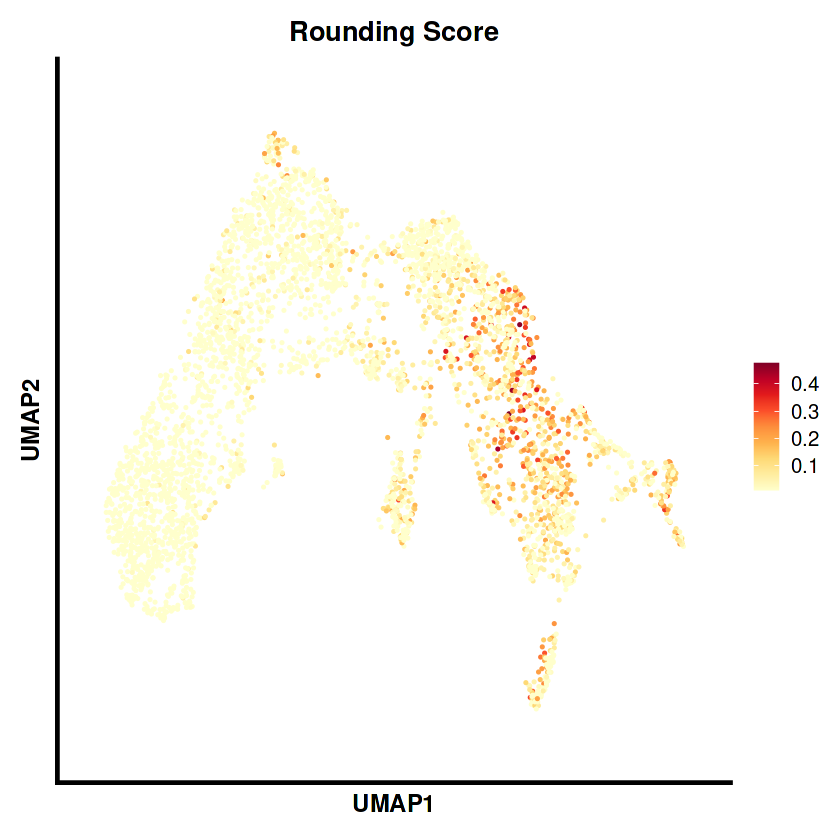

In [102]:
FeaturePlot(CMHarmony, 
            features = "Rounding_Score1", min.cutoff="q9") + 
theme(plot.title = element_text(hjust = 0.5,face = "bold")) +
theme(legend.position = "right") +
ggtitle("Rounding Score") +
theme(
  axis.text.x = element_blank(),
  axis.text.y = element_blank(),
axis.title.x = element_text(face="bold"),
axis.title.y = element_text(face="bold"),
  axis.ticks = element_blank(),
  axis.line.y = element_line(size = 1),
  axis.line.x = element_line(size = 1)) +
xlab("UMAP1") +
ylab("UMAP2") + scale_colour_gradientn(colours = brewer.pal(n = 11, name = "YlOrRd"))

Warning message in brewer.pal(n = 11, name = "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


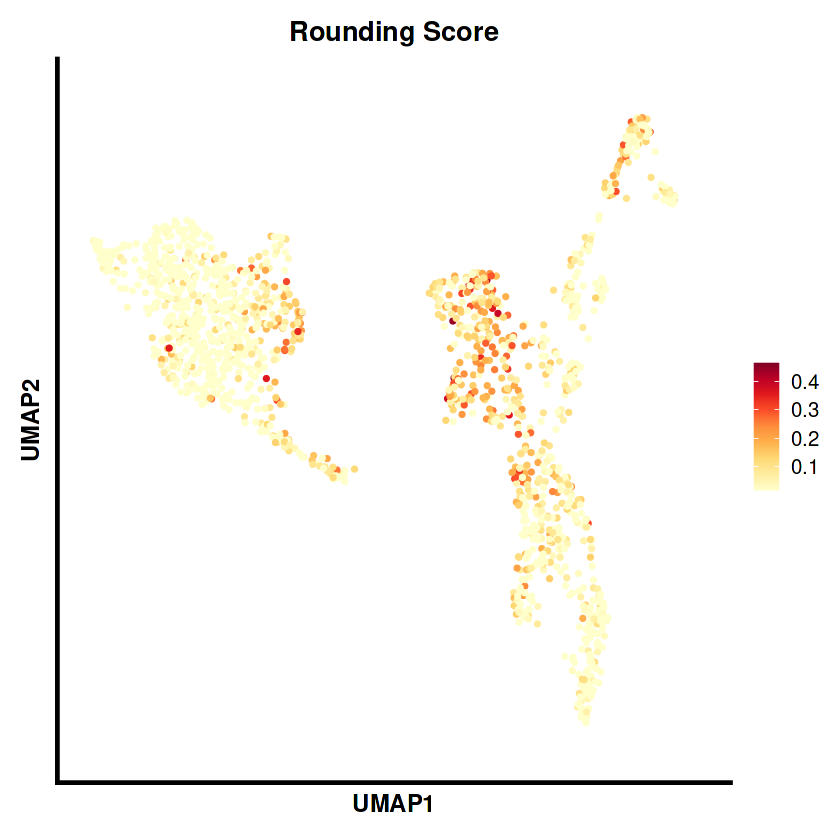

In [103]:
FeaturePlot(CMHarmony2, 
            features = "Rounding_Score1", min.cutoff="q9") + 
theme(plot.title = element_text(hjust = 0.5,face = "bold")) +
theme(legend.position = "right") +
ggtitle("Rounding Score") +
theme(
  axis.text.x = element_blank(),
  axis.text.y = element_blank(),
axis.title.x = element_text(face="bold"),
axis.title.y = element_text(face="bold"),
  axis.ticks = element_blank(),
  axis.line.y = element_line(size = 1),
  axis.line.x = element_line(size = 1)) +
xlab("UMAP1") +
ylab("UMAP2") + scale_colour_gradientn(colours = brewer.pal(n = 11, name = "YlOrRd"))

# P2 Scoring

In [120]:
CMControlDEG <- read.table("WithOlsenSingleCell/CMControlDEG.txt", sep="\t")
CMControlDEGDown <- subset(CMControlDEG, subset=avg_log2FC < 0)
CMHarmony <- AddModuleScore(CMHarmony, features = list(rownames(CMControlDEGDown)),  name="P2_Score")

Warning message:
“The following features are not present in the object: Cfap46, Nkain2, Gm20388, Gm11273, Gm26694, Car1, Rpl6l, Spag6l, Gm30382, Gm26848, Sorbs2os, Gm26632, Gm15614, not searching for symbol synonyms”


Warning message in brewer.pal(n = 11, name = "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


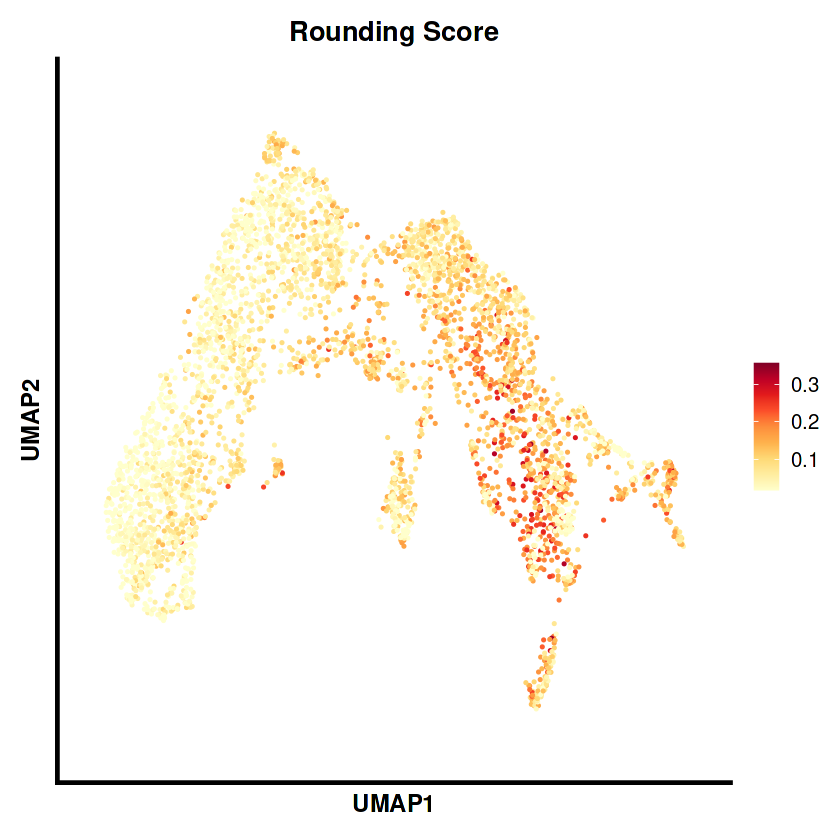

In [121]:
FeaturePlot(CMHarmony, 
            features = "P2_Score1", min.cutoff="q9") +
theme(plot.title = element_text(hjust = 0.5,face = "bold")) +
theme(legend.position = "right") +
ggtitle("Rounding Score") +
theme(
  axis.text.x = element_blank(),
  axis.text.y = element_blank(),
axis.title.x = element_text(face="bold"),
axis.title.y = element_text(face="bold"),
  axis.ticks = element_blank(),
  axis.line.y = element_line(size = 1),
  axis.line.x = element_line(size = 1)) +
xlab("UMAP1") +
ylab("UMAP2") + scale_colour_gradientn(colours = brewer.pal(n = 11, name = "YlOrRd"))

# Monocle2 Analysis

In [106]:
DefaultAssay(CMHarmony2) <- 'RNA'

In [112]:
Data <- as.matrix(GetAssayData(CMHarmony2))
Genes <- data.frame(rownames(CMHarmony2))
rownames(Genes) <- Genes[,1]
colnames(Genes)[1] <- "gene_short_name"
Meta <- data.frame(CMHarmony2@meta.data)

In [ ]:
CMHarmony2Monocle <- newCellDataSet(as.matrix(Data), 
                          featureData = new("AnnotatedDataFrame", data=Genes), 
                          phenoData = new("AnnotatedDataFrame", data=Meta))

In [ ]:
CMHarmony2Monocle <- estimateSizeFactors(CMHarmony2Monocle)
CMHarmony2Monocle <- setOrderingFilter(Monocle, CMHarmony2_Markers$gene)
CMHarmony2Monocle <- reduceDimension(Monocle, max_components = 2, method="DDRTree")
CMHarmony2Monocle <- orderCells(Monocle)

In [ ]:
MonocleName <- c("CMHarmony2")
MonocleList <- list("CMHarmony2"=Monocle)
for(i in MonocleName)
{
  jpeg(paste(i,"_Cell_Trajectory_State.jpg",sep=""),width=1000,height=700,res=200)
  g <- plot_cell_trajectory(MonocleList[[i]],
                            color_by="State",
                            show_state_number = F, 
                            show_branch_points = FALSE) + 
    scale_color_brewer(palette = "Set3")
  print(g)
  dev.off()
}

for(i in MonocleName)
{
  jpeg(paste(i,"_Cell_Trajectory_Experiment.jpg",sep=""),width=1000,height=500,res=200)
  g <- plot_cell_trajectory(MonocleList[[i]],
                            color_by="Experiment",
                            show_branch_points = FALSE) + 
    theme_void()
  print(g)
  dev.off()
}

for(i in MonocleName)
{
  jpeg(paste(i,"_Cell_Trajectory_Idents.jpg",sep=""),width=1000,height=500,res=200)
  g <- plot_cell_trajectory(MonocleList[[i]], 
                            color_by="Idents2",
                            show_branch_points = TRUE) + 
    theme_void()
  print(g)
  dev.off()
}
for(i in MonocleName)
{
  jpeg(paste(i,"_Cell_Trajectory_Idents_split.jpg",sep=""),width=4000,height=500,res=200)
  g <- plot_cell_trajectory(MonocleList[[i]],
                            color_by="Idents2") + 
    facet_wrap(~Idents2, nrow=1) + theme_void()
  print(g)
  dev.off()
}
for(i in MonocleName)
{
  jpeg(paste(i,"_Cell_Trajectory_Pseudotime.jpg",sep=""),width=1000,height=500,res=200)
  g <- plot_cell_trajectory(MonocleList[[i]],
                            color_by="Pseudotime",
                            show_branch_points = TRUE) + 
    theme_void()
  print(g)
  dev.off()
}



dev.off()

Matrix <- data.frame(t(MonocleList[[i]]@reducedDimS))
Idents <- data.frame(MonocleList[[i]]$Idents)
Idents <- str(Idents)
Matrix <- cbind(Matrix,Idents)
colnames(Matrix)[1] <- "Comp1"
colnames(Matrix)[2] <- "Comp2"
colnames(Matrix)[3] <- "Cluster"

for(i in MonocleName)
{
  Matrix <- data.frame(t(MonocleList[[i]]@reducedDimS))
  CFIdents <- data.frame(MonocleList[[i]]$Idents)
  Matrix <- cbind(Matrix,CFIdents)
  colnames(Matrix)[1] <- "Comp1"
  colnames(Matrix)[2] <- "Comp2"
  colnames(Matrix)[3] <- "Cluster"
  jpeg(paste(i,"_RidgePlot.jpg",sep=""), width=1080, res=200)
  g <- ggplot(Matrix, aes(x=Comp1, y=Cluster)) + 
    geom_density_ridges(aes(fill=Cluster)) + 
    theme_classic()
  print(g)
  dev.off()
  rm(Matrix)
  rm(CFIdents)
}

for(i in MonocleName)
{
  Matrix <- data.frame(t(MonocleList[[i]]@reducedDimS))
  CFIdents <- data.frame(MonocleList[[i]]$Idents)
  Matrix <- cbind(Matrix,CFIdents)
  colnames(Matrix)[1] <- "Comp1"
  colnames(Matrix)[2] <- "Comp2"
  colnames(Matrix)[3] <- "Cluster"
  jpeg(paste(i,"_RidgePlot2.jpg",sep=""), width=1080, res=200)
  g <- ggplot(Matrix, aes(x=Comp2, y=Cluster)) + 
    geom_density_ridges(aes(fill=Cluster)) + 
    theme_classic()
  print(g)
  dev.off()
  rm(Matrix)
  rm(CFIdents)
}

for(i in MonocleName)
{
  Matrix <- data.frame(t(MonocleList[[i]]@reducedDimS))
  CFIdents <- data.frame(MonocleList[[i]]$Experiment)
  Matrix <- cbind(Matrix,CFIdents)
  colnames(Matrix)[1] <- "Comp1"
  colnames(Matrix)[2] <- "Comp2"
  colnames(Matrix)[3] <- "Cluster"
  jpeg(paste(i,"_RidgePlot_Experiment.jpg",sep=""), width=1080, res=200)
  g <- ggplot(Matrix, aes(x=Comp1, y=Cluster)) + 
    geom_density_ridges(aes(fill=Cluster)) + 
    theme_classic()
  print(g)
  dev.off()
  rm(Matrix)
  rm(CFIdents)
}

for(i in MonocleName)
{
  Matrix <- data.frame(t(MonocleList[[i]]@reducedDimS))
  CFIdents <- data.frame(MonocleList[[i]]$Experiment)
  Matrix <- cbind(Matrix,CFIdents)
  colnames(Matrix)[1] <- "Comp1"
  colnames(Matrix)[2] <- "Comp2"
  colnames(Matrix)[3] <- "Cluster"
  jpeg(paste(i,"_RidgePlot_Experiment2.jpg",sep=""), width=1080, res=200)
  g <- ggplot(Matrix, aes(x=Comp2, y=Cluster)) + 
    geom_density_ridges(aes(fill=Cluster)) + 
    theme_classic()
  print(g)
  dev.off()
  rm(Matrix)
  rm(CFIdents)
}
gc()